# Fitting the data from a Ramsey experiment

In this notebook we analyse data from a Ramsey experiment. Using the method and data from:

Watson, T. F., Philips, S. G. J., Kawakami, E., Ward, D. R., Scarlino, P., Veldhorst, M., … Vandersypen, L. M. K. (2018). A programmable two-qubit quantum processor in silicon. Nature, 555(7698), 633–637. https://doi.org/10.1038/nature25766

The signal that results from a Ramsey experiment oscillates at a frequency corresponding to the difference between the qubit frequency and the MW source frequency. Therefore, it can be used to accurately calibrate the MW source to be on-resonance with the qubit. Additionally, the decay time of the Ramsey signal corresponds to the free-induction decay or T2* of the qubit.

This example takes a Ramsey dataset and uses the core function `qtt.algorithms.functions.fit_gauss_ramsey` to fit it, returning the frequency and decay of the signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qtt.algorithms.functions import gauss_ramsey, fit_gauss_ramsey

Test data, based on the data acquired by Watson et all.

In [2]:
y_data = np.array([0.6019, 0.5242, 0.3619, 0.1888, 0.1969, 0.3461, 0.5276, 0.5361,
       0.4261, 0.28  , 0.2323, 0.2992, 0.4373, 0.4803, 0.4438, 0.3392,
       0.3061, 0.3161, 0.3976, 0.4246, 0.398 , 0.3757, 0.3615, 0.3723,
       0.3803, 0.3873, 0.3873, 0.3561, 0.37  , 0.3819, 0.3834, 0.3838,
       0.37  , 0.383 , 0.3573, 0.3869, 0.3838, 0.3792, 0.3757, 0.3815])

total_wait_time = 1.6e-6
x_data = np.linspace(0, total_wait_time, len(y_data))

Plotting the data:

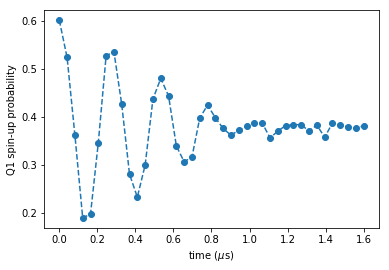

In [3]:
plt.figure()
plt.plot(x_data * 1e6,y_data, '--o')
plt.xlabel(r'time ($\mu$s)')
plt.ylabel('Q1 spin-up probability')
plt.show()

Applying the `fit_gauss_ramsey` function to fit the data:

In [4]:
par_fit_test, _ = fit_gauss_ramsey(x_data, y_data)
freq_fit = abs(par_fit_test[2] * 1e-6)
t2star_fit = par_fit_test[1] * 1e6

Plotting the data and the fit:

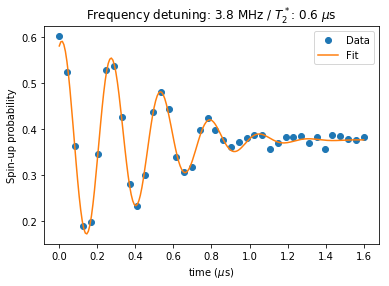

In [5]:
test_x = np.linspace(0, total_wait_time, 200)
plt.figure()
plt.plot(x_data * 1e6, y_data, 'o', label='Data')
plt.plot(test_x * 1e6, gauss_ramsey(test_x, par_fit_test), label='Fit')
plt.title('Frequency detuning: %.1f MHz / $T_2^*$: %.1f $\mu$s' % (freq_fit, t2star_fit))
plt.xlabel('time ($\mu$s)')
plt.ylabel('Spin-up probability')
plt.legend()
plt.show()

Note that for the Ramsey experiment, the frequency is of the MW source is offset by 4 MHz. Therefore, this experiment shows that the qubit was off-resonance from the source by -200 kHz.